In [1]:
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

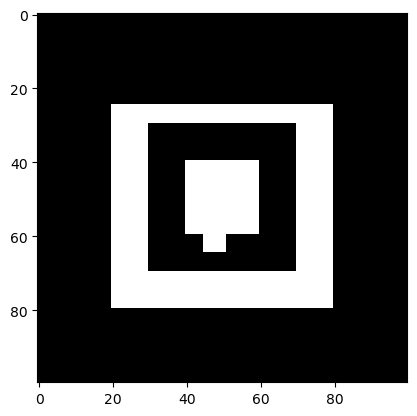

In [4]:
# generate a smile face

img = np.zeros((100, 100), dtype=np.uint8)
img[25:80, 20:80] = 255
img[30:70, 30:70] = 0
img[40:60, 40:60] = 255
img[60:65, 45:51] = 255


plt.imshow(img, cmap='gray')
plt.axis('on')
plt.show()

In [5]:
# define an affine transformation for rotation
def affine_rotate(angle):
    theta = np.deg2rad(angle)
    c, s = np.cos(theta), np.sin(theta)
    # create the rotation matrix 3x3
    rotation_matrix = np.array([[c, -s, 0],
                                 [s, c, 0],
                                 [0, 0, 1]])
    return rotation_matrix

def affine_translate(dx, dy):
    # create the translation matrix 3x3
    translation_matrix = np.array([[1, 0, dx],
                                    [0, 1, dy],
                                    [0, 0, 1]])
    return translation_matrix

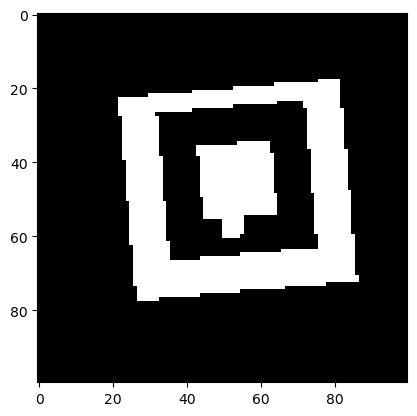

In [7]:
rot = affine_rotate(5)
trans = affine_translate(-25, -20)
img_aff = ndi.affine_transform(img, np.linalg.inv(rot), order=0)

plt.imshow(img_aff, cmap='gray')
# plt.axis('off')
plt.show()